Machine learning with scikit-learn
================

scikit-learn is the most used library for machine learning (but you might want to look into TensorFlow if you like deep-learning). It includes both supervised and unsupervised learning, clustering, feature reduction (PCA) and several pre-processing and performance metrics.

Despite the great number of algorithms implemented in the library, the structure is similar for all of them, making it easier to use them and plug them together. Advanced usage include pipelines and advanced cross-validations.

**Example: clusterization of the Iris dataset**

Datasets in `sciki.learn` follow the scheme `(n_samples, n_features)`; using `numpy.ndarrays` or `pandas.dataFrames` is advised.

In [27]:
from sklearn import datasets

In [28]:
datasets.load_iris()

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [29]:
iris = datasets.load_iris()

In [30]:
# rows are observations, columns are features
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [31]:
# true label for each observation
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
# label names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

A good practicein machine learning is to normalize the features, so that larger ones don\'t influence the clusterization process more than the others. 

In [33]:
from sklearn import preprocessing

In [34]:
# the simplest preprocessing is to standardize the data
std_scaler = preprocessing.StandardScaler()
iris.data = std_scaler.fit_transform(iris.data)

In [35]:
from sklearn.cluster import KMeans

Most algorithms have a `fit` method for training and then either a `transform` or a `predict` method that acts on new data.

In [36]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [37]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [38]:
# once the model has been fitted, we can add a new observation and can try to predict to which cluster they belong to
kmeans.predict([[5.8,  2.7,  4.0,  1.25],])

array([2], dtype=int32)

We are going to plot the dataset (using only two features for semplicity), together with the true labels (glyphs) and the clusters (colors). 

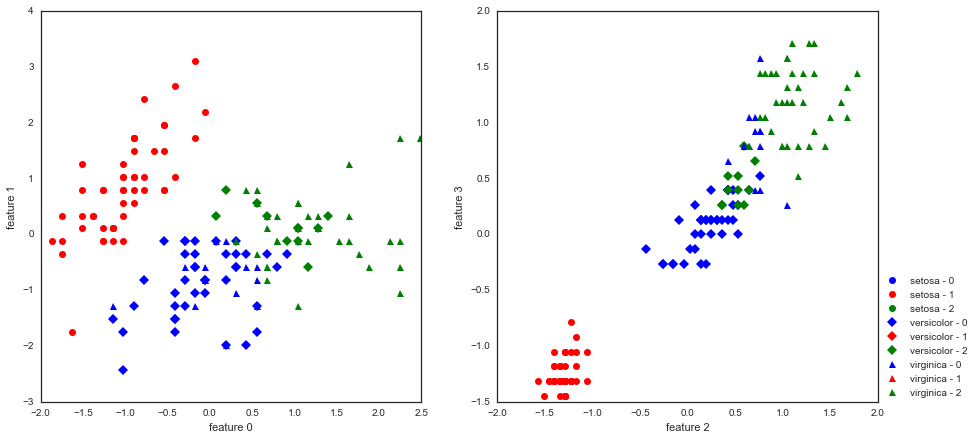

In [39]:
plt.figure(figsize=(15, 7))

plt.subplot(121)
for label, glyph in zip(set(iris.target), ('o', 'D', '^')):
    for cluster, color in zip(set(kmeans.labels_), ('b', 'r', 'g')):
        plt.plot(iris.data[(iris.target == label) & (kmeans.labels_ == cluster)][:, 0],
                 iris.data[(iris.target == label) & (kmeans.labels_ == cluster)][:, 1],
                 marker=glyph,
                 linestyle='',
                 color=color,
                 label='{0} - {1}'.format(iris.target_names[label],
                                          cluster))
plt.xlabel('feature 0')
plt.ylabel('feature 1')

plt.subplot(122)
for label, glyph in zip(set(iris.target), ('o', 'D', '^')):
    for cluster, color in zip(set(kmeans.labels_), ('b', 'r', 'g')):
        plt.plot(iris.data[(iris.target == label) & (kmeans.labels_ == cluster)][:, 2],
                 iris.data[(iris.target == label) & (kmeans.labels_ == cluster)][:, 3],
                 marker=glyph,
                 linestyle='',
                 color=color,
                 label='{0} - {1}'.format(iris.target_names[label],
                                          cluster))
plt.xlabel('feature 2')
plt.ylabel('feature 3')
plt.legend(loc=(1, 0));

The clustering is separating the three categories with a decent discriminative power; we can use some metrics implemented in scikit-learn to be more precise. We are going to use an homogeinity score to measure how "pure" each cluster is.

In [40]:
from sklearn import metrics

In [41]:
metrics.homogeneity_score(iris.target, kmeans.labels_)

0.65912650180490084

**Linear model classifier example**

In a real world scenario we would need to divide our dataset into a training and test set; for that purpose the `sklearn.cross_validation` module should be used.

In [42]:
from sklearn.linear_model import RidgeClassifier

The Ridge linear classifier has a parameter `alpha` that influences the fitting process; it is advisable to perform an additional cross-validation on the training data to find the optimal value for it.

In [43]:
ridge = RidgeClassifier(alpha=1.0)
ridge.fit(iris.data, iris.target)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [44]:
predictions = ridge.predict(iris.data)

In [45]:
metrics.f1_score(iris.target, predictions, average=None)

array([ 1.        ,  0.74157303,  0.79279279])

With this `alpha` parameter we are probably not overfitting the model, as we are not correctly predicting even the training data!

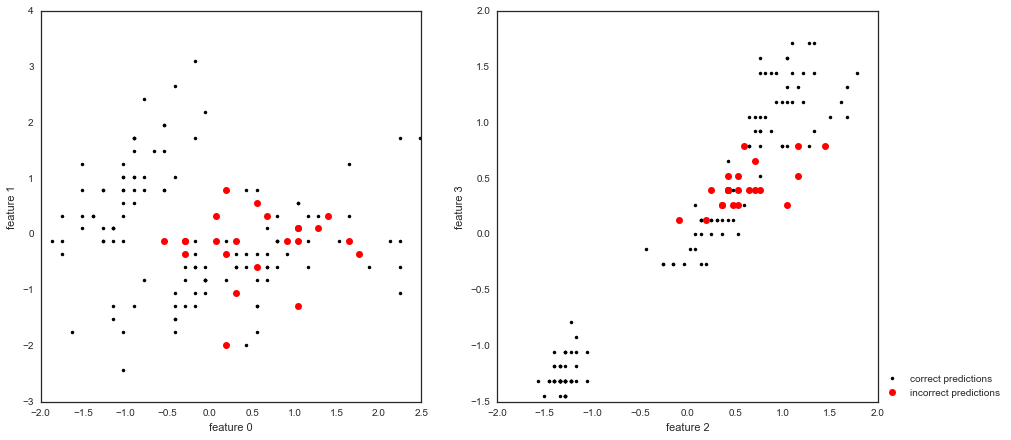

In [46]:
plt.figure(figsize=(15, 7))

plt.subplot(121)
plt.plot(iris.data[iris.target == predictions][:, 0],
         iris.data[iris.target == predictions][:, 1],
         'k.',
         label='correct predictions')
plt.plot(iris.data[iris.target != predictions][:, 0],
         iris.data[iris.target != predictions][:, 1],
         'ro',
         label='incorrect predictions')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

plt.subplot(122)
plt.plot(iris.data[iris.target == predictions][:, 2],
         iris.data[iris.target == predictions][:, 3],
         'k.',
         label='correct predictions')
plt.plot(iris.data[iris.target != predictions][:, 2],
         iris.data[iris.target != predictions][:, 3],
         'ro',
         label='incorrect predictions')
plt.xlabel('feature 2')
plt.ylabel('feature 3')
plt.legend(loc=(1, 0));

Other useful libraries
--------

- GOAtools: GO terms enrichment analysis in python
- statmodels: advanced statistics
- rpy2: useful interface to R, when your favorite library doesn\'t have a python alternative
- pysam: read and manipulate sam files
- pyvcf: read and manipulate VCF files

...and many more